### 一、什么是K近邻回归？

K近邻回归（K-Nearest Neighbors Regression，简称KNN回归）是一种简单直观的机器学习算法。KNN回归通过寻找样本空间中与目标点最接近的K个邻居，利用这些邻居的平均值或加权平均值来预测目标点的值。KNN回归属于非参数模型，因为它不对数据的分布做出假设，也不需要训练过程。

### 二、K近邻回归的原理

KNN回归的核心思想非常直观，即“相似的样本具有相似的输出”。具体步骤如下：

1. **计算距离**：对于待预测的样本点，计算其与训练集中每一个样本点之间的距离。常用的距离度量包括欧氏距离（Euclidean Distance）、曼哈顿距离（Manhattan Distance）等。
   
   欧氏距离的计算公式为：
   $$
   d(x_i, x_j) = \sqrt{\sum_{k=1}^{n} (x_{i,k} - x_{j,k})^2}
   $$
   其中，$ x_i $ 和 $ x_j $ 分别是两个样本点的特征向量，$ n $ 是特征的维数。

2. **选择K个邻居**：根据计算得到的距离，选择距离待预测样本点最近的K个邻居。

3. **计算预测值**：根据选中的K个邻居的输出值，计算待预测样本点的输出值。常用的方法包括简单平均和加权平均。如果是简单平均，则预测值为K个邻居的输出值的算术平均：
   
   $$
   \hat{y} = \frac{1}{K} \sum_{i=1}^{K} y_i
   $$
   其中，$ y_i $ 是第 $i$个邻居的输出值。

   如果采用加权平均，则预测值为K个邻居的加权平均值，权重通常为邻居与待预测样本点距离的倒数：
   
   $$
   \hat{y} = \frac{\sum_{i=1}^{K} \frac{1}{d(x, x_i)} y_i}{\sum_{i=1}^{K} \frac{1}{d(x, x_i)}}
   $$
   其中，$ d(x, x_i) $ 是待预测样本点与第 $ i $ 个邻居的距离。

### 三、K近邻回归的优缺点

**优点：**
- **简单直观**：算法思想简单，容易理解和实现。
- **无模型假设**：KNN回归不对数据的分布做任何假设，适用于各种数据分布。
- **高灵活性**：由于无需训练过程，KNN回归可以处理在线学习问题，也可以随时加入新的数据。

**缺点：**
- **计算复杂度高**：对于大规模数据集，计算每个样本点的距离代价较高，影响预测效率。
- **维度灾难**：随着特征维数的增加，样本之间的距离变得越来越难以区分，导致预测效果下降。
- **对异常值敏感**：KNN回归直接依赖于邻居的输出值，如果邻居中存在异常值，可能会严重影响预测结果。

### 四、案例分析

在这一部分，我们还是使用加州房价数据集来演示如何应用K近邻回归算法进行预测。加州房价数据集包含了加州的街区信息，每个街区有多项特征，包括人口、收入、房屋年龄等。目标是根据这些特征预测该街区的房屋中位数价格。


1. **数据加载与预处理**：
   - 加载加州房价数据集并进行标准化处理，确保所有特征都在相同的尺度上。
   - 将数据集划分为训练集和测试集，比例为8:2。

2. **模型训练**：
   - 使用`KNeighborsRegressor`创建一个K近邻回归模型，选择`K=5`，即考虑最近的5个邻居。
   - 用训练集的数据来训练模型。

3. **模型预测**：
   - 利用训练好的模型对测试集进行预测，并计算均方误差（MSE）作为模型性能的评估指标。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# 设置字体，解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 加载加州房价数据集
california = fetch_california_housing()
X = california.data
y = california.target

features = california.feature_names
data_df = pd.DataFrame(X, columns=features)
data_df['Target'] = y  

data_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


测试集的均方误差: 0.43


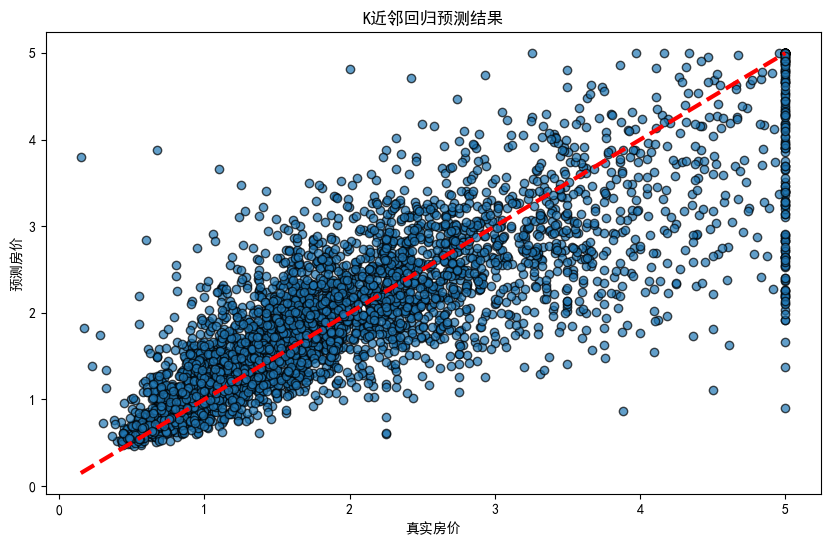

In [2]:
X = california.data
y = california.target

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 创建K近邻回归模型并训练
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# 预测测试集
y_pred = knn.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f"测试集的均方误差: {mse:.2f}")

# 可视化结果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=3)
plt.xlabel("真实房价")
plt.ylabel("预测房价")
plt.title("K近邻回归预测结果")
plt.show()